In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tqdm import tqdm

from scipy.stats import ortho_group
from WSMBSS import *
from numba import njit
from numba import jit
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

# Read The Whitened Image Patches from Olshaussen's Natural Image Dataset

In [2]:
source_path = 'MatlabArrays/Olshaussen'
X = scipy.io.loadmat(os.path.join(source_path,'imagepatcheselfwhitened.mat'))['imagepatches']

# Dictionary Learning

In [3]:
INPUT_STD = 0.5
for MixtureIndex in range(X.shape[0]):
    stdx = np.std(X[MixtureIndex,:])
    X[MixtureIndex,:] = X[MixtureIndex,:]/stdx*INPUT_STD

N = X.shape[1]
NumberofMixtures = 144
NumberofSources = 144

MUS = 1.25*1e-4
MUV = 5
OUTPUT_COMP_TOL = 1e-6
INPUT_STD = 0.5
MAX_OUT_ITERATIONS= 3000
LayerActivationArguments = [0,1]
LayerGains = [16,1]
LayerMinimumGains = [1e-6,1]
LayerMaximumGains = [1e6,1]
LayerGainStepSizes = [0.3125,0.3125]
SMWeights = 0.2*1e-15
WScalings = [0.0033, 0.0033]
GamScalings = 0.02
zeta = SMWeights
beta = 0.05
n_epochs = 1
muD = [0.3125, 0.3125]
D1 = LayerGains[0] * np.eye(NumberofSources)
D2 = LayerGains[1] * np.eye(NumberofSources)

s_dim = 144
x_dim = X.shape[0]
h_dim = 144
samples = X.shape[1]

M_H = GamScalings * np.eye(h_dim)
M_Y = GamScalings * np.eye(s_dim)

In [4]:
model = OnlineWSMBSS(s_dim = s_dim, x_dim = x_dim, h_dim = h_dim, 
                     gamma_start = MUS, beta = beta, zeta = zeta, 
                     muD = muD, M_H = M_H, WScalings = WScalings,
                     M_Y = M_Y, D1 = D1, D2 = D2, LayerMinimumGains = LayerMinimumGains,
                     LayerMaximumGains = LayerMaximumGains,neural_OUTPUT_COMP_TOL = OUTPUT_COMP_TOL,)

  0%|                                                | 0/312500 [00:00<?, ?it/s]

The receptive fields after 0


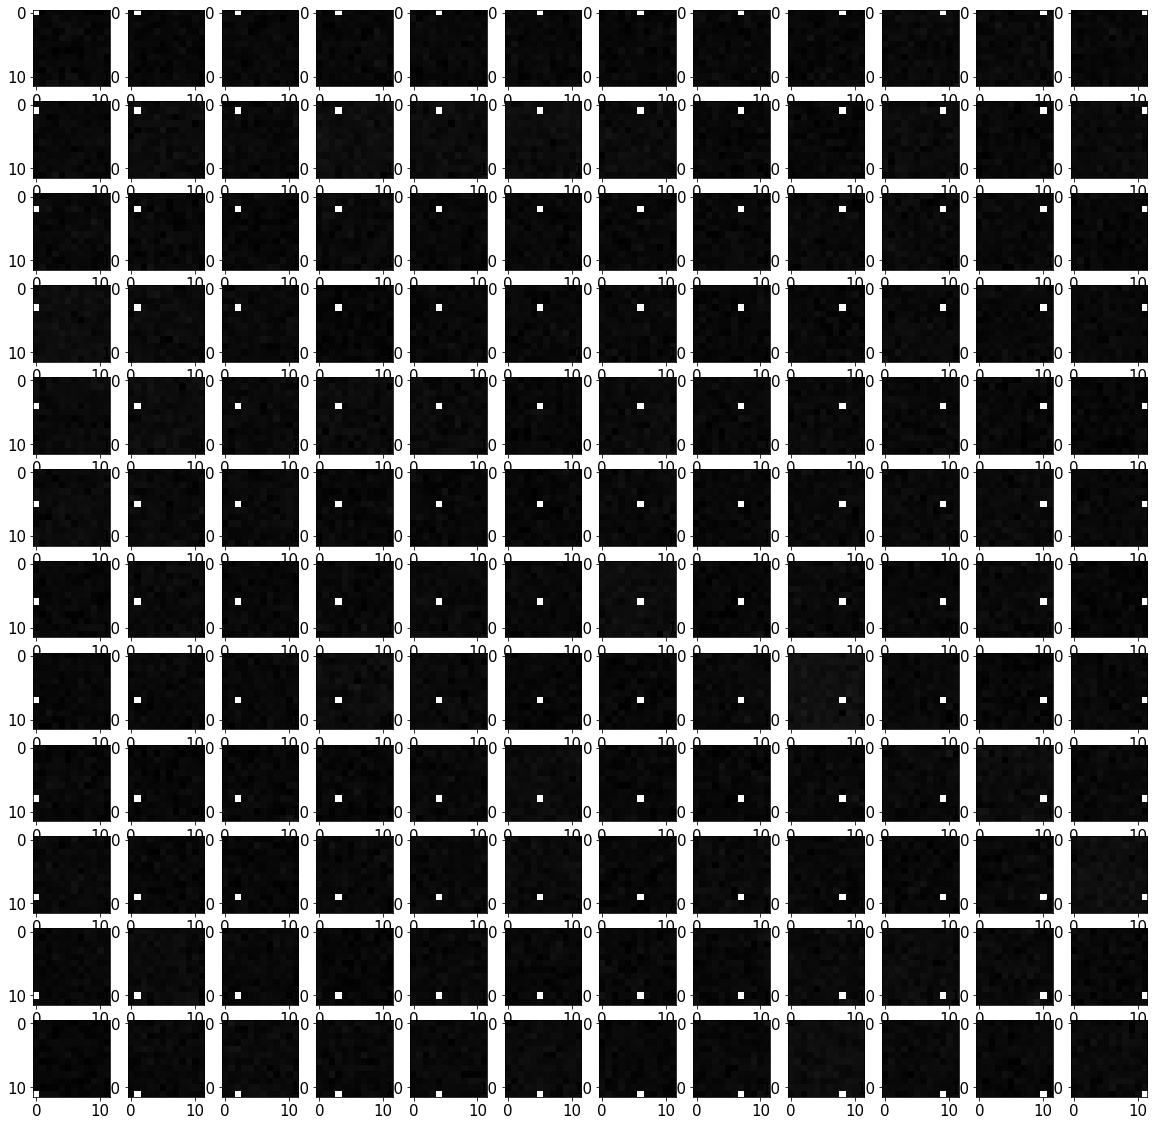

  2%|▋                                  | 5720/312500 [08:59<8:02:16, 10.60it/s]


In [ ]:
model.fit_batch_olhaussen(X, n_epochs = 1, debug_iteration_point = 50000, plot_rf = True)

# Plot the Resulting Sparse Dictionary

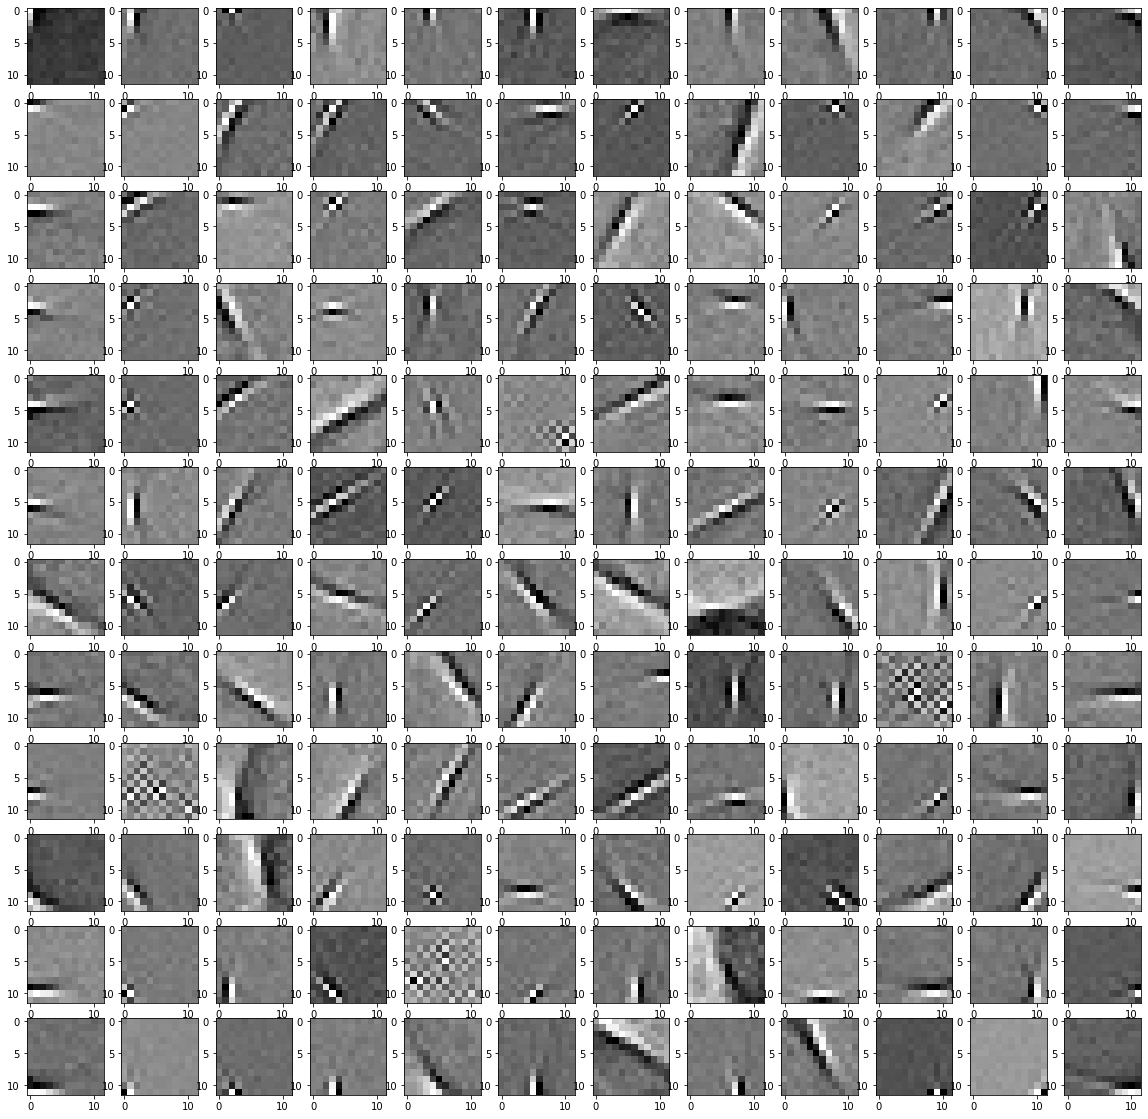

In [7]:
W = model.W
np.save('Olshaussen_Receptive_Fields.npy',W)

fig, ax = plt.subplots(12,12, figsize = (20,20))
for l in range(144):
    rf = np.reshape(W[l,:], (12,12))
    rf = ZeroOneNormalizeData(rf)
    ax[l//12, l%12].imshow(rf, cmap = 'gray')
plt.savefig('Olshaussen_rf_plot.png')
plt.show()
